<a href="https://colab.research.google.com/github/Sanket-ai-eng/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices/blob/main/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# 1. Load Dataset

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FitPulse.csv.csv')
df.head()

,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
3,2025-01-28 08:55:00,NaN,38.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise


# Basic Overview

In [83]:
df.shape

(8671, 4)

In [84]:
# To find statistical values(min, max, mean, count,std)
df.describe()

,heart_rate,step_count
count,8262.000000,8334.000000
mean,72.326340,26.309935
std,12.002177,54.358931
min,32.776138,0.000000
25%,65.378882,12.000000
50%,72.194583,25.000000
75%,78.885036,37.000000
max,248.000000,1909.000000


In [85]:
# To find data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671 entries, 0 to 8670
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_stamp      8671 non-null   object 
 1   heart_rate      8262 non-null   float64
 2   step_count      8334 non-null   float64
 3   sleep_tracking  8671 non-null   object 
dtypes: float64(2), object(2)
memory usage: 271.1+ KB


In [86]:
# To find null values
df.isnull().sum()

,0
time_stamp,0
heart_rate,409
step_count,337
sleep_tracking,0


In [87]:
# To find percentage of null values
df.isnull().mean()*100

,0
time_stamp,0.000000
heart_rate,4.716872
step_count,3.886518
sleep_tracking,0.000000


# Time stamp conversion(object to datetime)

In [88]:
# 3. Convert timestamp
df['time_stamp'] = pd.to_datetime(df['time_stamp'], errors='coerce')

In [89]:
df.head()

,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
3,2025-01-28 08:55:00,NaN,38.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise


# Removing Missing Values

In [90]:
# Removing missing values
print(f"Shape of DataFrame before removing missing values: {df.shape}")
df = df.dropna()

Shape of DataFrame before removing missing values: (8671, 4)


In [91]:
print(f"Shape of DataFrame after removing missing values: {df.shape}")
display(df.head())

Shape of DataFrame after removing missing values: (7936, 4)


,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise
5,2025-01-13 07:20:00,92.702179,34.0,awake


In [92]:
print(f"Shape of DataFrame before removing duplicate values: {df.shape}")
df = df.drop_duplicates()

Shape of DataFrame before removing duplicate values: (7936, 4)


In [93]:
print(f"Shape of DataFrame after removing duplicate values: {df.shape}")
display(df.head())

Shape of DataFrame after removing duplicate values: (7910, 4)


,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise
5,2025-01-13 07:20:00,92.702179,34.0,awake


In [94]:
df.head()

,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise
5,2025-01-13 07:20:00,92.702179,34.0,awake


In [95]:
df.describe()

,time_stamp,heart_rate,step_count
count,7910,7910.000000,7910.000000
mean,2025-01-16 03:26:38.874841856,72.328117,26.371176
min,2025-01-01 00:00:00,32.776138,0.000000
25%,2025-01-08 13:11:15,65.382178,12.000000
50%,2025-01-16 00:42:30,72.190831,25.000000
75%,2025-01-23 12:48:45,78.872474,37.000000
max,2025-12-01 00:10:00,248.000000,1909.000000
std,NaN,12.081688,55.693395


# Vizualisation for finding outliers

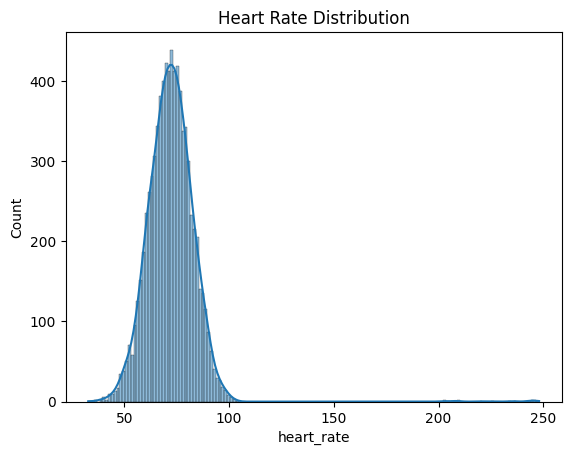

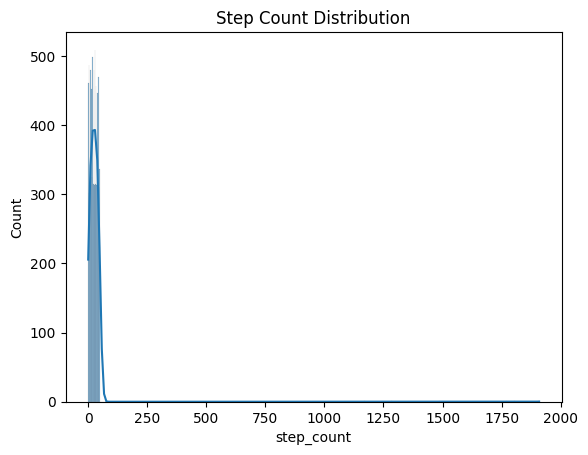

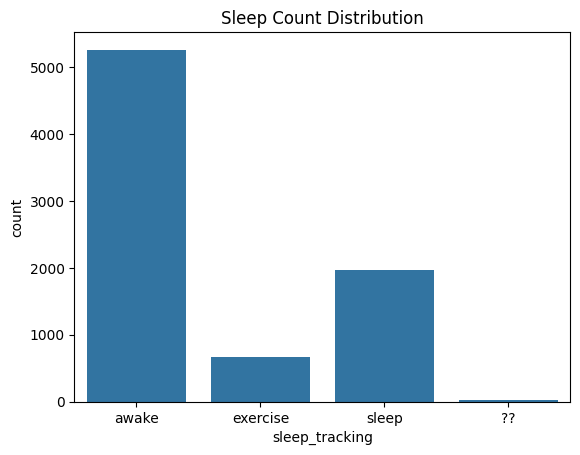

In [96]:
# 6. Distribution Plots
plt.figure()
sns.histplot(df['heart_rate'], kde=True)
plt.title("Heart Rate Distribution")
plt.show()

plt.figure()
sns.histplot(df['step_count'], kde=True)
plt.title("Step Count Distribution")
plt.show()

plt.figure()
sns.countplot(x='sleep_tracking', data=df)
plt.title("Sleep Count Distribution")
plt.show()

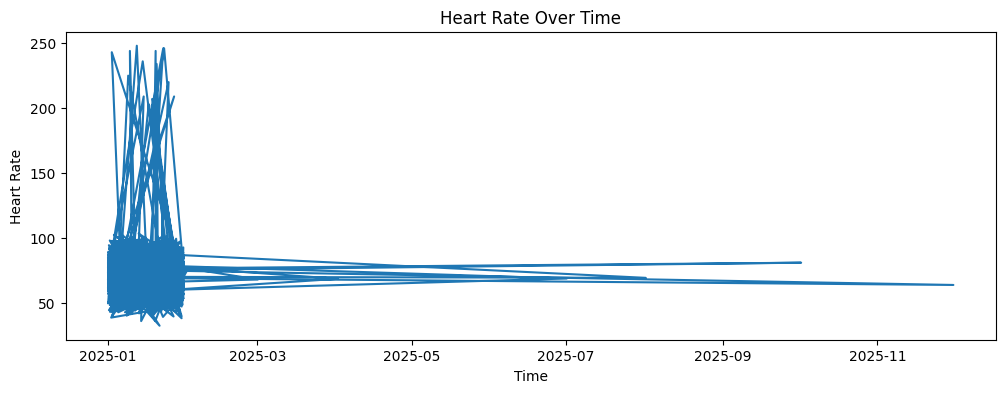

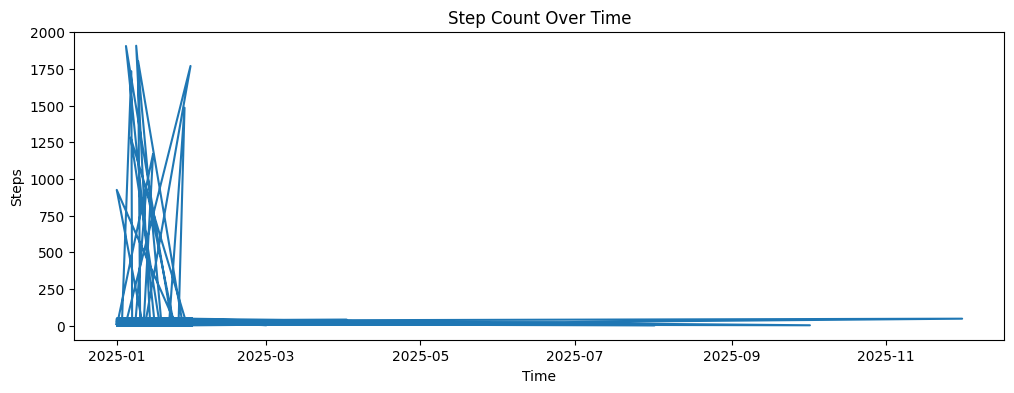

In [97]:
# 7. Time-Series Visualization

plt.figure(figsize=(12,4))
plt.plot(df['time_stamp'], df['heart_rate'])
plt.title("Heart Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df['time_stamp'], df['step_count'])
plt.title("Step Count Over Time")
plt.xlabel("Time")
plt.ylabel("Steps")
plt.show()


# Removing Outliers

In [98]:
# Outlier Detection of heart_rate
Q1 = df['heart_rate'].quantile(0.25)
Q3 = df['heart_rate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['heart_rate'] < Q1 - 1.5*IQR) |
              (df['heart_rate'] > Q3 + 1.5*IQR)]

print("Number of heart rate outliers:", outliers.shape[0])

Number of heart rate outliers: 66


In [99]:
# Outlier Detection of step_count
Q1 = df['step_count'].quantile(0.25)
Q3 = df['step_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['step_count'] < Q1 - 1.5*IQR) |
              (df['step_count'] > Q3 + 1.5*IQR)]

print("Number of heart rate outliers:", outliers.shape[0])

Number of heart rate outliers: 10


In [100]:
# Removing outliers by deciding range of data

# Heart rate realistic range
df = df[(df['heart_rate'] >= 40) & (df['heart_rate'] <= 200)]

# Step count realistic limit per 5 minutes
df = df[(df['step_count'] >= 0) & (df['step_count'] <= 1500)]


In [101]:
# Outlier Detection of heart_rate after filtering
Q1 = df['heart_rate'].quantile(0.25)
Q3 = df['heart_rate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['heart_rate'] < Q1 - 1.5*IQR) |
              (df['heart_rate'] > Q3 + 1.5*IQR)]

print("Number of heart rate outliers:", outliers.shape[0])

Number of heart rate outliers: 45


In [102]:
# Outlier Detection of step_count after filtering
Q1 = df['step_count'].quantile(0.25)
Q3 = df['step_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['step_count'] < Q1 - 1.5*IQR) |
              (df['step_count'] > Q3 + 1.5*IQR)]

print("Number of heart rate outliers:", outliers.shape[0])

Number of heart rate outliers: 5


In [103]:
df.head()

,time_stamp,heart_rate,step_count,sleep_tracking
0,2025-01-14 16:50:00,74.499653,26.0,awake
1,2025-01-21 08:55:00,90.833116,6.0,awake
2,2025-01-17 07:10:00,61.270774,40.0,awake
4,2025-01-18 18:25:00,59.807869,29.0,exercise
5,2025-01-13 07:20:00,92.702179,34.0,awake


In [104]:
df.to_csv("FitPulse_cleaned.csv", index=False)

In [105]:
from google.colab import files
files.download("FitPulse_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>